In [189]:
import numpy as np

In [190]:
import pandas as pd

In [191]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [192]:
data = pd.read_csv('Tata-steel.csv')

In [193]:
print(data.head())

        Date  Open Price  High Price  Low Price  Close Price         WAP  \
0  03-Jul-15      308.00      308.00     299.75       300.95  302.708180   
1  06-Jul-15      294.90      299.60     292.30       298.75  295.646338   
2  07-Jul-15      300.75      303.25     296.00       297.45  299.477691   
3  08-Jul-15      293.80      294.00     282.00       283.40  286.875105   
4  09-Jul-15      285.20      287.25     279.60       280.55  282.860975   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0        499554           6430             151219082              118810.0   
1        663354           9184             196118181              117663.0   
2        877207           8581             262703927              211277.0   
3       1446189          20272             414875621              563505.0   
4        974983          13946             275784642              330248.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
0      

In [194]:
# Assuming your data has a 'Close Price' column for stock prices
sequence_length = 9  # You can adjust this number
sequences = []

# Creating sequences
for i in range(len(data) - sequence_length):
    sequence = data['Close Price'].values[i : i+sequence_length]
    sequences.append(sequence)

sequences = np.array(sequences)


In [195]:
train_size = int(0.8 * len(sequences))  # 80% for training, 20% for testing
train_data = sequences[:train_size]
test_data = sequences[train_size:]

In [196]:
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(8, 1)),  # Adjust the input shape
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [197]:
X_train = train_data[:, :-1]  # Using all values except the last as input
y_train = train_data[:, -1]   # Using the last value as the target
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model.fit(X_train, y_train, epochs=50, batch_size=16)  # You can adjust epochs and batch size


Epoch 1/50
74/74 [==============================] - 2s 4ms/step - loss: 120326.4922
Epoch 2/50
74/74 [==============================] - 0s 5ms/step - loss: 291.2633
Epoch 3/50
74/74 [==============================] - 0s 6ms/step - loss: 250.2138
Epoch 4/50
74/74 [==============================] - 0s 4ms/step - loss: 226.5240
Epoch 5/50
74/74 [==============================] - 0s 4ms/step - loss: 213.6212
Epoch 6/50
74/74 [==============================] - 0s 5ms/step - loss: 240.7559
Epoch 7/50
74/74 [==============================] - 0s 4ms/step - loss: 207.2185
Epoch 8/50
74/74 [==============================] - 0s 5ms/step - loss: 204.5678
Epoch 9/50
74/74 [==============================] - 0s 4ms/step - loss: 203.9921
Epoch 10/50
74/74 [==============================] - 0s 5ms/step - loss: 197.2963
Epoch 11/50
74/74 [==============================] - 0s 4ms/step - loss: 196.5527
Epoch 12/50
74/74 [==============================] - 0s 4ms/step - loss: 221.2527
Epoch 13/50
74/74 [===

In [198]:
X_test = test_data[:, :-1]
y_test = test_data[:, -1]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)


10/10 [==============================] - 0s 3ms/step


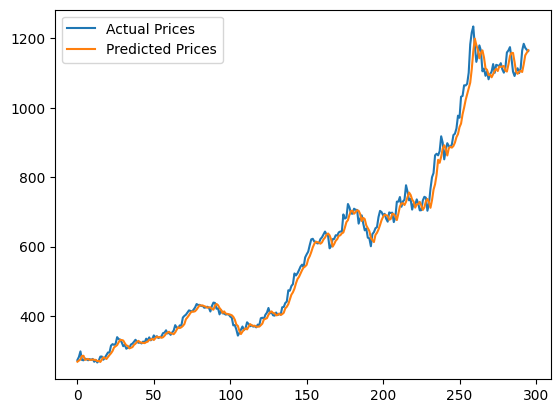

In [199]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()

In [200]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 584.87


In [203]:
# Print both actual and predicted prices for comparison
for i in range(len(y_test)):
    print(f"Actual Price: {y_test[i]:.2f} | Predicted Price: {predictions[i][0]:.2f}")


Actual Price: 273.55 | Predicted Price: 268.69
Actual Price: 282.50 | Predicted Price: 271.85
Actual Price: 298.45 | Predicted Price: 275.13
Actual Price: 273.70 | Predicted Price: 285.21
Actual Price: 272.70 | Predicted Price: 285.82
Actual Price: 277.65 | Predicted Price: 273.94
Actual Price: 275.85 | Predicted Price: 275.30
Actual Price: 272.85 | Predicted Price: 276.78
Actual Price: 276.20 | Predicted Price: 273.82
Actual Price: 273.85 | Predicted Price: 274.05
Actual Price: 276.80 | Predicted Price: 275.25
Actual Price: 268.60 | Predicted Price: 274.12
Actual Price: 273.45 | Predicted Price: 273.91
Actual Price: 266.45 | Predicted Price: 270.24
Actual Price: 271.95 | Predicted Price: 271.22
Actual Price: 283.30 | Predicted Price: 267.92
Actual Price: 283.60 | Predicted Price: 274.58
Actual Price: 274.45 | Predicted Price: 281.26
Actual Price: 280.50 | Predicted Price: 279.34
Actual Price: 287.95 | Predicted Price: 276.49
Actual Price: 295.15 | Predicted Price: 282.38
Actual Price:

In [213]:
# Predict the stock prices for the next 2 days
predicted_prices = model.predict(input_data)

# Print predicted prices for the next 2 days
for i in range(2):
    if i < predicted_prices.shape[1]:
        print(f"Predicted Price for Day {i + 1}: {predicted_prices[0][i]:.2f}")
    else: 
        print(f"No prediction available for Day {i + 1}")

1/1 [==============================] - 0s 50ms/step
Predicted Price for Day 1: 1165.65
No prediction available for Day 2
